##Face Recognition for Gender Classification: Exploring ResNet-50 on the CelebA Dataset

*   This Google Colab notebook dives into the realm of face recognition, specifically focusing on gender classification using ResNet-50. The CelebA dataset, a massive collection of celebrity facial images, will serve as our training ground. We'll leverage ResNet-50, a powerful deep learning model, to extract features from faces and ultimately predict their genders.



Why ResNet-50 and CelebA?


*   ResNet-50, a deep convolutional neural network (CNN), has excelled in image classification tasks. Its residual connections combat the vanishing gradient problem, enabling deeper networks with enhanced performance. Here, we aim to harness these capabilities to extract meaningful features related to gender from facial images.

*    The CelebA dataset, boasting a vast collection of celebrity faces with associated gender labels, provides a rich training ground for our model. This abundance of data offers the potential to train a robust system capable of generalizing to unseen faces.



Is ResNet-50 the Ultimate Choice?


*   While ResNet-50 is a strong contender, we shouldn't limit our exploration. This project might uncover alternative approaches. We might consider fine-tuning other pre-trained models from TensorFlow's keras.applications module, like VGG16 or InceptionV3, if computational resources permit.



Project Goals:


*   Develop a face recognition system for gender classification using ResNet-50 and transfer learning.
*   Train and evaluate the model on the CelebA dataset.
*   Gain insights into the effectiveness of ResNet-50 for gender classification.



##Mount Gdrive and Import Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!rm -drf Input
#Removes an existing directory named "Input" along with its contents, ensuring a clean slate for the next steps.
!cp  '/content/drive/MyDrive/ResNet_Image Classification/drive-download-20240301T152957Z-001/txt_folders/anno/list_attribute.txt' .
#Copies a text file named "list_attribute.txt" from a specified Google Drive location to the current working directory.
!mkdir Input
#Creates a new directory named "Input" in the current working directory.
!cp  -a '/content/drive/MyDrive/ResNet_Image Classification/drive-download-20240301T152957Z-001/Images/' Input
#Copies all files and directories from the "Images" folder in Google Drive to the newly created "Input" directory.
!ls
#Lists the contents of the current working directory, allowing us to verify the copied files and directory structure.

drive  Input  list_attribute.txt  sample_data


In [3]:
!ls 'Input/Images' -1 | wc -l
#Counts the number of files within the "Input/Images" directory.

5027


In [ ]:
import keras #deep learning framework (built on top of TensorFlow) for building, training, and deploying neural networks.
import cv2 as cv #Open-source library widely used for computer vision tasks and image processing
import seaborn as sns #user-friendly interface for creating attractive and informative statistical graphics.
import matplotlib.pyplot as plt # creating various plots and charts to visualize data
import numpy as np #  fundamental tool for scientific computing in Python
import os #  providing functions for interacting with the operating system.
import pandas as pd #Tool for data analysis, manipulation, and loading/saving data from various sources


In [ ]:
from keras import layers
from keras import models
from keras import preprocessing
from keras.applications import InceptionV3

In [ ]:
#open-source library for numerical computation and large-scale machine learning
from tensorflow import data as tf_data
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.losses import CategoricalCrossentropy

In [4]:
#extension module for the popular Matplotlib library. It provides functionalities for creating 3D visualizations
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [5]:
nRowsRead = 5 # This variable defines the number of rows to read from the CSV file
df = pd.read_csv('list_attribute.txt', delimiter=r"\s+", nrows = nRowsRead, skiprows=1) #reads data,defines the delimiter (separator) between values in the file,  limits the number of rows read and skips the first row of the CSV file
df.dataframeName = 'list_attribute.txt'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 5 rows and 40 columns


In [6]:
print(df)

            5_o_Clock_Shadow  Arched_Eyebrows  Attractive  Bags_Under_Eyes  \
000001.jpg                -1                1           1               -1   
000002.jpg                -1               -1          -1                1   
000003.jpg                -1               -1          -1               -1   
000004.jpg                -1               -1           1               -1   
000005.jpg                -1                1           1               -1   

            Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  Blond_Hair  ...  \
000001.jpg    -1     -1        -1        -1          -1          -1  ...   
000002.jpg    -1     -1        -1         1          -1          -1  ...   
000003.jpg    -1     -1         1        -1          -1          -1  ...   
000004.jpg    -1     -1        -1        -1          -1          -1  ...   
000005.jpg    -1     -1         1        -1          -1          -1  ...   

            Sideburns  Smiling  Straight_Hair  Wavy_Hair  Wearing_Earrings

In [7]:
df.tail(5)

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [8]:
#manipulates the column names of a pandas dataframe (df) to insert a new column named "image_id" at the beginning
names = df.columns.values
names = names.tolist()
names.insert(0, "image_id")
names

['image_id',
 '5_o_Clock_Shadow',
 'Arched_Eyebrows',
 'Attractive',
 'Bags_Under_Eyes',
 'Bald',
 'Bangs',
 'Big_Lips',
 'Big_Nose',
 'Black_Hair',
 'Blond_Hair',
 'Blurry',
 'Brown_Hair',
 'Bushy_Eyebrows',
 'Chubby',
 'Double_Chin',
 'Eyeglasses',
 'Goatee',
 'Gray_Hair',
 'Heavy_Makeup',
 'High_Cheekbones',
 'Male',
 'Mouth_Slightly_Open',
 'Mustache',
 'Narrow_Eyes',
 'No_Beard',
 'Oval_Face',
 'Pale_Skin',
 'Pointy_Nose',
 'Receding_Hairline',
 'Rosy_Cheeks',
 'Sideburns',
 'Smiling',
 'Straight_Hair',
 'Wavy_Hair',
 'Wearing_Earrings',
 'Wearing_Hat',
 'Wearing_Lipstick',
 'Wearing_Necklace',
 'Wearing_Necktie',
 'Young']

In [9]:
dat_fr = pd.read_csv('list_attribute.txt', delimiter=r"\s+", nrows = None, skiprows=2, names=names)
dat_fr.dataframeName = 'list_attribute.txt'
nRow, nCol = dat_fr.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 202599 rows and 41 columns


In [10]:
list_picture = os.listdir("Input/Images")
#Converting to NumPy Array
array_picture = np.array(list_picture)
print(array_picture)

['139338.jpg' '010825.jpg' '013318.jpg' ... '039213.jpg' '196846.jpg'
 '050322.jpg']


In [14]:
dat_fr = dat_fr[dat_fr['image_id'].isin(array_picture)]
dat_fr.shape[0]
#filters a pandas DataFrame (dat_fr) based on a condition involving the image IDs and a NumPy array, and then retrieves the number of rows in the resulting filtered DataFrame

5000

In [15]:
dat_fr.tail(5)

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
202319,202320.jpg,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,-1,1,-1,-1,1,-1,-1,1
202339,202340.jpg,-1,-1,1,-1,-1,-1,-1,-1,1,...,-1,1,1,-1,-1,-1,1,-1,-1,1
202346,202347.jpg,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,1,-1,-1,1
202356,202357.jpg,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,-1,1
202565,202566.jpg,-1,-1,1,-1,-1,-1,-1,-1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1


##Feature Visualize

In [16]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
  #visualize the distribution of data within each column of a pandas DataFrame
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] #calculates the number of unique values in each column of the DataFrame and stores the results in a Series named nunique
    nRow, nCol = df.shape
    columnNames = list(df) #converts the column names of df into a Python list
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow) #calculates the number of rows required to display all desired graphs
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1) #creates a subplot at a specific position in the grid layout defined earlier.
        columnDf = df.iloc[:, i] #extracts the data for the current column (index i) as a Series named columnDf
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [3]:
plotPerColumnDistribution(dat_fr, 5, 10) #Secifies the number of graphs (distributions) to display in the plot

NameError: name 'plotPerColumnDistribution' is not defined

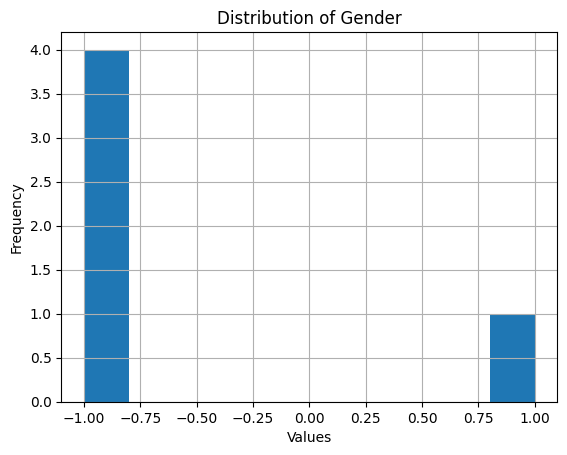

In [18]:
df.iloc[:, 20].hist()
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Gender')
plt.show()
# Access column 20 using iloc for indexing

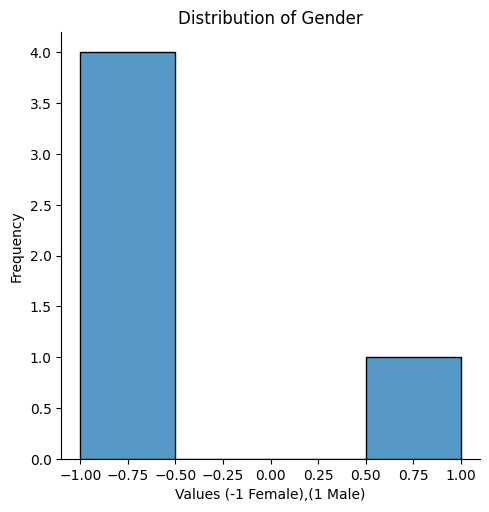

In [19]:
import seaborn as sns

sns.displot(df.iloc[:, 20])  # Similar access as in histogram
plt.xlabel('Values (-1 Female),(1 Male)')
plt.ylabel('Frequency')
plt.title('Distribution of Gender')
plt.show()


##Filtering Data

In [20]:
num_skipped = 0
folder_path = os.path.join("Input", "Images")
for fname in os.listdir(folder_path):
    fpath = os.path.join(folder_path, fname)
    try:
        fobj = open(fpath, "rb")
        is_jfif = b"JFIF" in fobj.peek(10)
    finally:
        fobj.close()

    if not is_jfif:
        num_skipped += 1
        # Delete corrupted image
        os.remove(fpath)
print(f"Deleted {num_skipped} images.")

Deleted 0 images.


##Generate the DataSets

In [24]:
img_id = dat_fr['image_id'].values
img_id

array(['000051.jpg', '000052.jpg', '000065.jpg', ..., '202347.jpg',
       '202357.jpg', '202566.jpg'], dtype=object)

In [25]:
img = cv.imread(f'{folder_path}/202566.jpg')
img.shape
#Size of the Picture

(218, 178, 3)

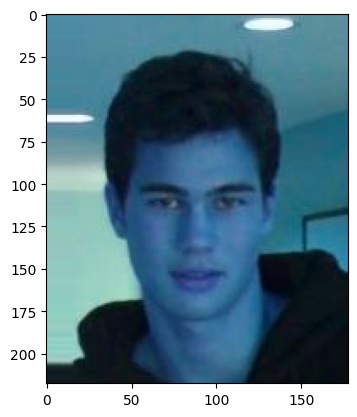

In [26]:
plt.imshow(img)

In [27]:
!rm -drf Dataset

!mkdir Dataset
!mkdir Dataset/Train
!mkdir Dataset/Test

!mkdir Dataset/Train/Male
!mkdir Dataset/Train/Female

!mkdir Dataset/Test/Male
!mkdir Dataset/Test/Female
#Make Directory for dataset

In [28]:
train_num = 4000
male = dat_fr['Male'].values

for i in range(len(img_id)):
  if(i < train_num):
    if(male[i] == -1):
      shutil.copyfile(f'{folder_path}/{img_id[i]}', f'Dataset/Train/Female/{img_id[i]}')
    else:
      shutil.copyfile(f'{folder_path}/{img_id[i]}', f'Dataset/Train/Male/{img_id[i]}')
  else:
    if(male[i] == -1):
      shutil.copyfile(f'{folder_path}/{img_id[i]}', f'Dataset/Test/Female/{img_id[i]}')
    else:
      shutil.copyfile(f'{folder_path}/{img_id[i]}', f'Dataset/Test/Male/{img_id[i]}')
#Create directories for copying Images based on Gender (Training and Test Set)

In [29]:
#
image_size = (224, 224)
batch_size = 32

train_dir = 'Dataset/Train'

train_datagen = preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)

valid_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)

Found 3201 images belonging to 2 classes.
Found 799 images belonging to 2 classes.


##Visualize Data Training

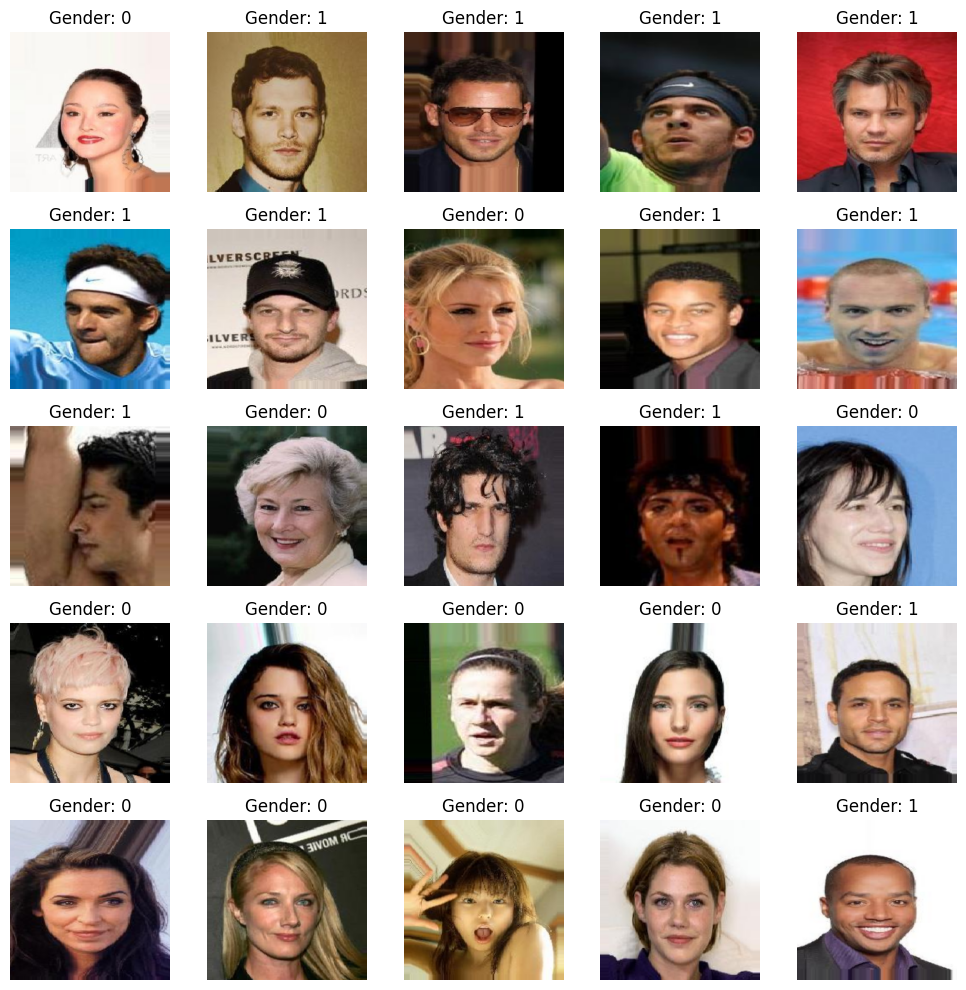

In [30]:
batch = train_generator.next()
fig, axs = plt.subplots(5, 5, figsize=(10, 10))
for i in range(5):
    for j in range(5):
        index = i * 5 + j
        axs[i, j].imshow(batch[0][index])
        axs[i, j].axis('off')
        axs[i, j].set_title(f'Gender: {batch[1][index].argmax()}')

plt.tight_layout()
plt.show()

##Build Model and Training Session

In [46]:
#without dropout
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Model

# Define base model (freeze pre-trained layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False  # Freeze pre-trained layers

# Transfer learning - add new layers on top of frozen base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
# Optional: Add Dropout for regularization (adjust rate as needed)
#x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)  # Adjust num_classes based on your problem

# Create the final model (using Model class)
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model (omitted for brevity)


In [37]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_6[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [40]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
optimizer = Adam(learning_rate=0.0001)
loss = CategoricalCrossentropy()
metrics = ['accuracy']
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
model.fit(train_generator, validation_data=valid_generator, epochs=20)

Epoch 1/20
101/101 [==============================] - 66s 574ms/step - loss: 0.7244 - accuracy: 0.5358 - val_loss: 0.6647 - val_accuracy: 0.6158
Epoch 2/20
101/101 [==============================] - 52s 516ms/step - loss: 0.6685 - accuracy: 0.5942 - val_loss: 0.6572 - val_accuracy: 0.5945
Epoch 3/20
101/101 [==============================] - 52s 515ms/step - loss: 0.6550 - accuracy: 0.6239 - val_loss: 0.7010 - val_accuracy: 0.5907
Epoch 4/20
101/101 [==============================] - 52s 516ms/step - loss: 0.6571 - accuracy: 0.6092 - val_loss: 0.6281 - val_accuracy: 0.6533
Epoch 5/20
101/101 [==============================] - 61s 609ms/step - loss: 0.6378 - accuracy: 0.6410 - val_loss: 0.6241 - val_accuracy: 0.6471
Epoch 6/20
101/101 [==============================] - 51s 509ms/step - loss: 0.6351 - accuracy: 0.6485 - val_loss: 0.6176 - val_accuracy: 0.6683
Epoch 7/20
101/101 [==============================] - 52s 513ms/step - loss: 0.6293 - accuracy: 0.6467 - val_loss: 0.6169 - val_ac

##Validating Model

In [41]:
model.evaluate(valid_generator)

25/25 [==============================] - 10s 415ms/step - loss: 0.5840 - accuracy: 0.6996


[0.5839692950248718, 0.6996245384216309]

##Testing Model

In [44]:
test_datagen = preprocessing.image.ImageDataGenerator(rescale=1./255)

# Load test data from directory
test_generator = test_datagen.flow_from_directory(
        'Dataset/Test',
        target_size=(224, 224),  # InceptionV3's input size
        batch_size=128,
        class_mode='categorical')  # Assuming categorical classification

# Evaluate the model on test data
evaluation = model.evaluate(test_generator)

# Print evaluation metrics
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

Found 1000 images belonging to 2 classes.
8/8 [==============================] - 15s 1s/step - loss: 0.5675 - accuracy: 0.7060
Test Loss: 0.5675174593925476
Test Accuracy: 0.7059999704360962


##Graphics (WH - Dropout (32,64,128))

In [52]:
# Define base model (freeze pre-trained layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False  # Freeze pre-trained layers

# Transfer learning - add new layers on top of frozen base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
# Optional: Add Dropout for regularization (adjust rate as needed)
#x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)  # Adjust num_classes based on your problem

# Create the final model (using Model class)
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model (omitted for brevity)


# Compile the model (without dropout)
optimizer = Adam(learning_rate=0.0001)
loss = CategoricalCrossentropy()  # Adjust loss function as needed
metrics = ['accuracy']  # Optionally add other metrics

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)


In [53]:
history = model.fit(train_generator, validation_data=valid_generator, epochs=20)

Epoch 1/20
101/101 [==============================] - 57s 534ms/step - loss: 0.6863 - accuracy: 0.5783 - val_loss: 0.6769 - val_accuracy: 0.6345
Epoch 2/20
101/101 [==============================] - 50s 498ms/step - loss: 0.6652 - accuracy: 0.5951 - val_loss: 0.6726 - val_accuracy: 0.5932
Epoch 3/20
101/101 [==============================] - 51s 503ms/step - loss: 0.6538 - accuracy: 0.6214 - val_loss: 0.6605 - val_accuracy: 0.6533
Epoch 4/20
101/101 [==============================] - 55s 550ms/step - loss: 0.6410 - accuracy: 0.6392 - val_loss: 0.6384 - val_accuracy: 0.6333
Epoch 5/20
101/101 [==============================] - 52s 518ms/step - loss: 0.6390 - accuracy: 0.6311 - val_loss: 0.6592 - val_accuracy: 0.6208
Epoch 6/20
101/101 [==============================] - 50s 500ms/step - loss: 0.6306 - accuracy: 0.6495 - val_loss: 0.6375 - val_accuracy: 0.6270
Epoch 7/20
101/101 [==============================] - 50s 491ms/step - loss: 0.6306 - accuracy: 0.6448 - val_loss: 0.6162 - val_ac

In [58]:
model.evaluate(valid_generator)

25/25 [==============================] - 10s 411ms/step - loss: 0.5816 - accuracy: 0.7034


[0.5815933346748352, 0.703379213809967]

In [61]:
test_datagen = preprocessing.image.ImageDataGenerator(rescale=1./255)

# Load test data from directory
test_generator = test_datagen.flow_from_directory(
        'Dataset/Test',
        target_size=(224, 224),  # InceptionV3's input size
        batch_size=128,
        class_mode='categorical')  # Assuming categorical classification

# Evaluate the model on test data
evaluation = model.evaluate(test_generator)

# Print evaluation metrics
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

Found 1000 images belonging to 2 classes.
8/8 [==============================] - 4s 428ms/step - loss: 0.5676 - accuracy: 0.7210
Test Loss: 0.5675919651985168
Test Accuracy: 0.7210000157356262


In [59]:
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

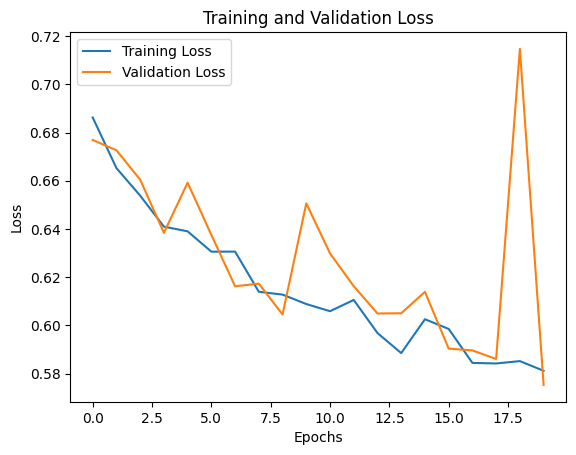

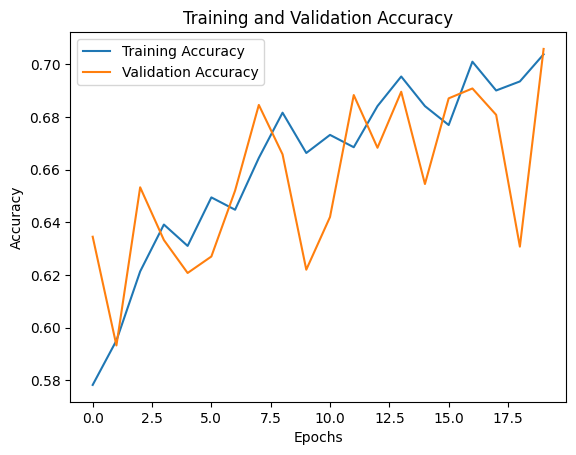

In [60]:

epochs = range(len(train_loss))  # Create a list of epochs

plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure()  # Create a new figure for accuracy

plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


##BS 64

In [62]:
image_size = (224, 224)
batch_size = 64

train_dir = 'Dataset/Train'

train_datagen = preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)

valid_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)


Found 3201 images belonging to 2 classes.
Found 799 images belonging to 2 classes.


In [63]:
# Define base model (freeze pre-trained layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False  # Freeze pre-trained layers

# Transfer learning - add new layers on top of frozen base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
# Optional: Add Dropout for regularization (adjust rate as needed)
#x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)  # Adjust num_classes based on your problem

# Create the final model (using Model class)
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model (omitted for brevity)


In [64]:
optimizer = Adam(learning_rate=0.0001)
loss = CategoricalCrossentropy()
metrics = ['accuracy']
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
model.fit(train_generator, validation_data=valid_generator, epochs=20)


Epoch 1/20
51/51 [==============================] - 65s 1s/step - loss: 0.6837 - accuracy: 0.5820 - val_loss: 0.6699 - val_accuracy: 0.6133
Epoch 2/20
51/51 [==============================] - 61s 1s/step - loss: 0.6761 - accuracy: 0.5914 - val_loss: 0.6772 - val_accuracy: 0.5857
Epoch 3/20
51/51 [==============================] - 59s 1s/step - loss: 0.6624 - accuracy: 0.6057 - val_loss: 0.6510 - val_accuracy: 0.6358
Epoch 4/20
51/51 [==============================] - 57s 1s/step - loss: 0.6707 - accuracy: 0.6057 - val_loss: 0.6489 - val_accuracy: 0.6233
Epoch 5/20
51/51 [==============================] - 53s 1s/step - loss: 0.6629 - accuracy: 0.6132 - val_loss: 0.6537 - val_accuracy: 0.6058
Epoch 6/20
51/51 [==============================] - 53s 1s/step - loss: 0.6475 - accuracy: 0.6254 - val_loss: 0.6754 - val_accuracy: 0.5782
Epoch 7/20
51/51 [==============================] - 54s 1s/step - loss: 0.6432 - accuracy: 0.6301 - val_loss: 0.6298 - val_accuracy: 0.6283
Epoch 8/20
51/51 [==

In [65]:
model.evaluate(valid_generator)

13/13 [==============================] - 11s 840ms/step - loss: 0.6506 - accuracy: 0.6308


[0.6505680084228516, 0.6307885050773621]

In [66]:
test_datagen = preprocessing.image.ImageDataGenerator(rescale=1./255)

# Load test data from directory
test_generator = test_datagen.flow_from_directory(
        'Dataset/Test',
        target_size=(224, 224),  # InceptionV3's input size
        batch_size=128,
        class_mode='categorical')  # Assuming categorical classification

# Evaluate the model on test data
evaluation = model.evaluate(test_generator)

# Print evaluation metrics
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

Found 1000 images belonging to 2 classes.
8/8 [==============================] - 4s 424ms/step - loss: 0.6065 - accuracy: 0.6590
Test Loss: 0.6065196394920349
Test Accuracy: 0.6589999794960022


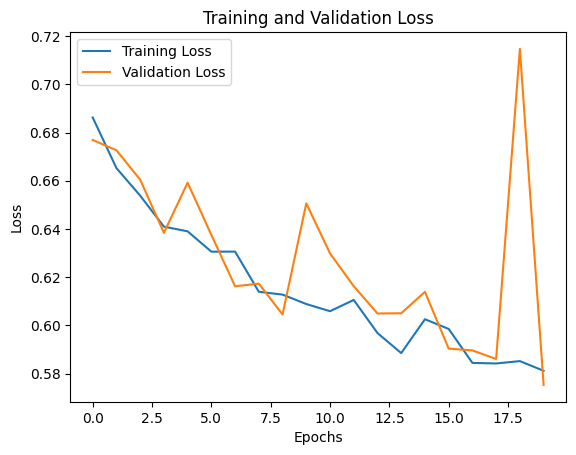

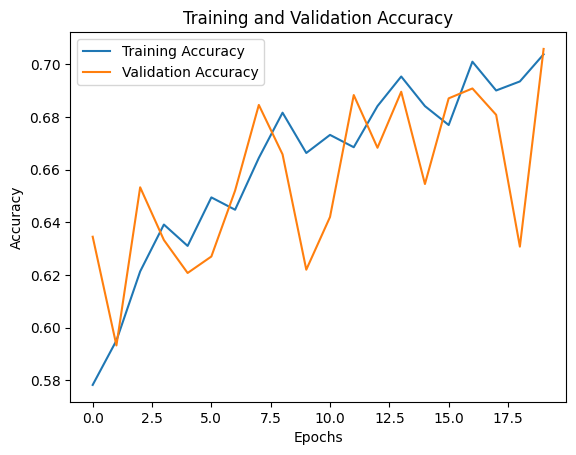

In [70]:
epochs = range(len(train_loss))  # Create a list of epochs

plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure()  # Create a new figure for accuracy

plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


##bs 128

In [71]:
image_size = (224, 224)
batch_size = 128

train_dir = 'Dataset/Train'

train_datagen = preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)

valid_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)


Found 3201 images belonging to 2 classes.
Found 799 images belonging to 2 classes.


In [72]:
# Define base model (freeze pre-trained layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False  # Freeze pre-trained layers

# Transfer learning - add new layers on top of frozen base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
# Optional: Add Dropout for regularization (adjust rate as needed)
#x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)  # Adjust num_classes based on your problem

# Create the final model (using Model class)
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model (omitted for brevity)


In [73]:
optimizer = Adam(learning_rate=0.0001)
loss = CategoricalCrossentropy()
metrics = ['accuracy']
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
model.fit(train_generator, validation_data=valid_generator, epochs=20)


Epoch 1/20
26/26 [==============================] - 58s 2s/step - loss: 0.6966 - accuracy: 0.5704 - val_loss: 0.6758 - val_accuracy: 0.5832
Epoch 2/20
26/26 [==============================] - 52s 2s/step - loss: 0.6801 - accuracy: 0.5848 - val_loss: 0.6700 - val_accuracy: 0.5857
Epoch 3/20
26/26 [==============================] - 53s 2s/step - loss: 0.6838 - accuracy: 0.5776 - val_loss: 0.6632 - val_accuracy: 0.5932
Epoch 4/20
26/26 [==============================] - 52s 2s/step - loss: 0.6633 - accuracy: 0.5973 - val_loss: 0.6712 - val_accuracy: 0.5882
Epoch 5/20
26/26 [==============================] - 52s 2s/step - loss: 0.6781 - accuracy: 0.6007 - val_loss: 0.6777 - val_accuracy: 0.6020
Epoch 6/20
26/26 [==============================] - 62s 2s/step - loss: 0.6774 - accuracy: 0.5614 - val_loss: 0.6545 - val_accuracy: 0.6483
Epoch 7/20
26/26 [==============================] - 53s 2s/step - loss: 0.6599 - accuracy: 0.6098 - val_loss: 0.6473 - val_accuracy: 0.6308
Epoch 8/20
26/26 [==

In [74]:
model.evaluate(valid_generator)

7/7 [==============================] - 10s 1s/step - loss: 0.6390 - accuracy: 0.6270


[0.6389737725257874, 0.6270337700843811]

In [75]:
test_datagen = preprocessing.image.ImageDataGenerator(rescale=1./255)

# Load test data from directory
test_generator = test_datagen.flow_from_directory(
        'Dataset/Test',
        target_size=(224, 224),  # InceptionV3's input size
        batch_size=128,
        class_mode='categorical')  # Assuming categorical classification

# Evaluate the model on test data
evaluation = model.evaluate(test_generator)

# Print evaluation metrics
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

Found 1000 images belonging to 2 classes.
8/8 [==============================] - 4s 428ms/step - loss: 0.6128 - accuracy: 0.6600
Test Loss: 0.6128172874450684
Test Accuracy: 0.6600000262260437


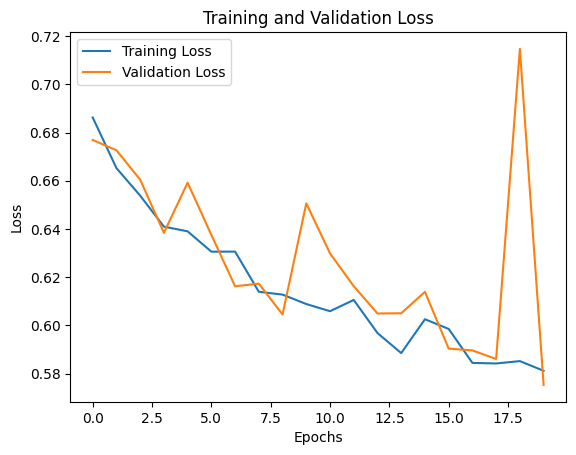

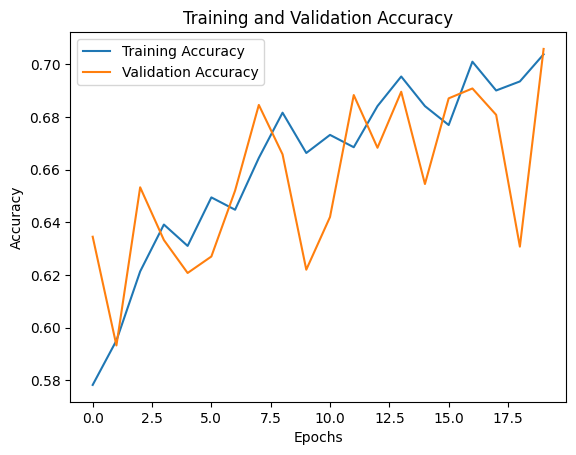

In [76]:
epochs = range(len(train_loss))  # Create a list of epochs

plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure()  # Create a new figure for accuracy

plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

##If with dropout (Since 32 model known as the best, we'll use model 32)

In [79]:
image_size = (224, 224)
batch_size = 32

train_dir = 'Dataset/Train'

train_datagen = preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)

valid_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)


Found 3201 images belonging to 2 classes.
Found 799 images belonging to 2 classes.


In [80]:
# Define base model (freeze pre-trained layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False  # Freeze pre-trained layers

# Transfer learning - add new layers on top of frozen base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
# Optional: Add Dropout for regularization (adjust rate as needed)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)  # Adjust num_classes based on your problem

# Create the final model (using Model class)
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model (omitted for brevity)


In [81]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_14 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_14[0][0]']            
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [82]:
optimizer = Adam(learning_rate=0.0001)
loss = CategoricalCrossentropy()
metrics = ['accuracy']
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
model.fit(train_generator, validation_data=valid_generator, epochs=20)

Epoch 1/20
101/101 [==============================] - 57s 507ms/step - loss: 0.7404 - accuracy: 0.5320 - val_loss: 0.7444 - val_accuracy: 0.4168
Epoch 2/20
101/101 [==============================] - 48s 476ms/step - loss: 0.7002 - accuracy: 0.5664 - val_loss: 0.7201 - val_accuracy: 0.4168
Epoch 3/20
101/101 [==============================] - 51s 504ms/step - loss: 0.6813 - accuracy: 0.5820 - val_loss: 0.6534 - val_accuracy: 0.6220
Epoch 4/20
101/101 [==============================] - 50s 491ms/step - loss: 0.6821 - accuracy: 0.5904 - val_loss: 0.6916 - val_accuracy: 0.4543
Epoch 5/20
101/101 [==============================] - 50s 492ms/step - loss: 0.6782 - accuracy: 0.5942 - val_loss: 0.6618 - val_accuracy: 0.6533
Epoch 6/20
101/101 [==============================] - 48s 477ms/step - loss: 0.6739 - accuracy: 0.6017 - val_loss: 0.6498 - val_accuracy: 0.6809
Epoch 7/20
101/101 [==============================] - 51s 503ms/step - loss: 0.6723 - accuracy: 0.6023 - val_loss: 0.6714 - val_ac

In [83]:
model.evaluate(valid_generator)

25/25 [==============================] - 10s 374ms/step - loss: 0.6038 - accuracy: 0.6571


[0.6038358807563782, 0.6570713520050049]

In [84]:
test_datagen = preprocessing.image.ImageDataGenerator(rescale=1./255)

# Load test data from directory
test_generator = test_datagen.flow_from_directory(
        'Dataset/Test',
        target_size=(224, 224),  # InceptionV3's input size
        batch_size=128,
        class_mode='categorical')  # Assuming categorical classification

# Evaluate the model on test data
evaluation = model.evaluate(test_generator)

# Print evaluation metrics
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])


Found 1000 images belonging to 2 classes.
8/8 [==============================] - 4s 437ms/step - loss: 0.5960 - accuracy: 0.6920
Test Loss: 0.5959845185279846
Test Accuracy: 0.6919999718666077
